In [1]:
%matplotlib inline
import matplotlib
import seaborn as sns

import pandas as pd
import numpy as np
from datetime import timedelta, datetime

In [2]:
# Get the route files
# import subprocess
# subprocess.run("powershell Invoke-WebRequest {} -OutFile {}".format('http://data.mytransit.nyc.s3.amazonaws.com/gtfs/2015/gtfs_nyct_bus_20150103.zip', 'gtfs_nyct_bus_20150103.zip'), shell=True)
# subprocess.run("powershell Invoke-WebRequest {} -OutFile {}".format('http://data.mytransit.nyc.s3.amazonaws.com/bus_time/2015/2015-01/bus_time_20150128.csv.xz', 'bus_time_20150128.csv.xz'), shell=True)
# subprocess.run("powershell Invoke-WebRequest {} -OutFile {}".format('http://data.mytransit.nyc.s3.amazonaws.com/bus_time/2015/2015-01/bus_time_20150129.csv.xz', 'bus_time_20150129.csv.xz'), shell=True)


import zipfile
import lzma
zip = zipfile.ZipFile('gtfs_nyct_bus_20150103.zip')
zip.extractall()

In [3]:
def convert_to_int64(row):
    try:
        return np.int64(row)
    except ValueError:
        return np.nan

def utc_to_est(row):
    try:
        return row - timedelta(hours=5)
    except:
        raise

csv_f = pd.read_csv
archive = pd.concat([csv_f("bus_time_20150128.csv"),
                     csv_f("bus_time_20150129.csv")])        
        
trips = pd.read_csv("trips.txt")
stops = pd.read_csv("stops.txt")
schedules = pd.read_csv("stop_times.txt")

/opt/conda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2705: DtypeWarning: Columns (9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
archive.next_stop_id = archive.next_stop_id.apply(convert_to_int64)

In [5]:
#query and clean
live_archive = archive[archive.block_assigned > 0] # "assigned" to a route
today = live_archive[live_archive.service_date == 20150128] # due to time shift we get some dates in 1/27 and 1/29
#throw away trips with <15 reports
good_trips_only = today.groupby(today.trip_id).filter(lambda group: len(group) > 15)

#write this as our "clean" dataset
good_trips_only.to_csv("realtime.csv")

#merged dataframe with both 
partial = good_trips_only.merge(trips, on='trip_id') 
df = partial.merge(stops, left_on="next_stop_id", right_on="stop_id")

In [6]:
# Select one bus route 
pd.options.display.max_columns = None
m15_only = df[df.route_id.str.contains("M15")].reset_index()
m15_only["timestamp"] = pd.to_datetime(m15_only["timestamp"])

In [7]:
m15_only

,index,timestamp,vehicle_id,latitude,longitude,bearing,progress,service_date,trip_id,block_assigned,next_stop_id,dist_along_route,dist_from_stop,route_id,service_id,trip_headsign,direction_id,shape_id,stop_id,stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station
0,161849,2015-01-28 05:23:55,6786,40.803310,-73.933166,233.93,0,20150128,OH_A5-Weekday-SDon-002000_M15_2,1,401738,180.23,108.89,M15,OH_A5-Weekday-SDon,SOUTH FERRY via 2 AV,1,M150351,401738,2 AV/E 125 ST,NaN,40.802494,-73.933891,NaN,NaN,0,NaN
1,161850,2015-01-28 05:24:26,6786,40.802600,-73.933682,234.02,0,20150128,OH_A5-Weekday-SDon-002000_M15_2,1,401738,180.23,18.77,M15,OH_A5-Weekday-SDon,SOUTH FERRY via 2 AV,1,M150351,401738,2 AV/E 125 ST,NaN,40.802494,-73.933891,NaN,NaN,0,NaN
2,161851,2015-01-28 06:07:21,3904,40.803394,-73.933011,157.83,0,20150128,OH_A5-Weekday-SDon-006000_M15_3,1,401738,180.23,130.16,M15,OH_A5-Weekday-SDon,SOUTH FERRY via 2 AV,1,M150351,401738,2 AV/E 125 ST,NaN,40.802494,-73.933891,NaN,NaN,0,NaN
3,161852,2015-01-28 06:07:53,3904,40.802610,-73.933675,234.02,0,20150128,OH_A5-Weekday-SDon-006000_M15_3,1,401738,180.23,20.03,M15,OH_A5-Weekday-SDon,SOUTH FERRY via 2 AV,1,M150351,401738,2 AV/E 125 ST,NaN,40.802494,-73.933891,NaN,NaN,0,NaN
4,161853,2015-01-28 06:33:26,3892,40.802570,-73.933704,234.02,0,20150128,OH_A5-Weekday-SDon-009000_M15_4,1,401738,180.23,15.02,M15,OH_A5-Weekday-SDon,SOUTH FERRY via 2 AV,1,M150351,401738,2 AV/E 125 ST,NaN,40.802494,-73.933891,NaN,NaN,0,NaN
5,161854,2015-01-28 07:05:57,6702,40.803162,-73.933273,233.93,0,20150128,OH_A5-Weekday-SDon-012000_M15_1,1,401738,180.23,90.11,M15,OH_A5-Weekday-SDon,SOUTH FERRY via 2 AV,1,M150351,401738,2 AV/E 125 ST,NaN,40.802494,-73.933891,NaN,NaN,0,NaN
6,161855,2015-01-28 07:06:29,6702,40.802452,-73.933790,234.02,0,20150128,OH_A5-Weekday-SDon-012000_M15_1,1,401738,180.23,0,M15,OH_A5-Weekday-SDon,SOUTH FERRY via 2 AV,1,M150351,401738,2 AV/E 125 ST,NaN,40.802494,-73.933891,NaN,NaN,0,NaN
7,161856,2015-01-28 07:24:48,6786,40.803224,-73.932591,157.39,2,20150128,OH_A5-Weekday-SDon-015000_M15_2,1,401738,180.23,170.21,M15,OH_A5-Weekday-SDon,SOUTH FERRY via 2 AV,1,M150351,401738,2 AV/E 125 ST,NaN,40.802494,-73.933891,NaN,NaN,0,NaN
8,161857,2015-01-28 07:25:20,6786,40.803224,-73.932591,157.39,2,20150128,OH_A5-Weekday-SDon-015000_M15_2,1,401738,180.23,170.21,M15,OH_A5-Weekday-SDon,SOUTH FERRY via 2 AV,1,M150351,401738,2 AV/E 125 ST,NaN,40.802494,-73.933891,NaN,NaN,0,NaN
9,161858,2015-01-28 07:25:52,6786,40.803224,-73.932591,157.39,2,20150128,OH_A5-Weekday-SDon-015000_M15_2,1,401738,180.23,170.21,M15,OH_A5-Weekday-SDon,SOUTH FERRY via 2 AV,1,M150351,401738,2 AV/E 125 ST,NaN,40.802494,-73.933891,NaN,NaN,0,NaN


In [7]:
m15_reg = m15_only[m15_only.trip_id.str.contains("M15")].reset_index()
m15_sbs = m15_only[m15_only.trip_id.str.contains("SBS")].reset_index()

In [8]:
print('The number of regular M15 buses over 48 hours =',len(m15_reg.trip_id.unique()))
print('The number of express M15 buses over 48 hours =',len(m15_sbs.trip_id.unique()))

('The number of regular M15 buses over 48 hours =', 257)
('The number of express M15 buses over 48 hours =', 335)


In [10]:
#m15_sbs.trip_id.unique()

In [21]:
# Analyze one Regular trip and one Express trip
trip_002000_M15_2 = m15_reg[m15_reg.trip_id.str.contains("002000_M15_2")]
trip_028500_SBS15_1 = m15_sbs[m15_sbs.trip_id.str.contains("029500_SBS15_2")]
sbs_sorted = trip_028500_SBS15_1.sort_values('timestamp')
#trip_002000_M15_2.stop_name.unique()

In [10]:
print(len(trip_002000_M15_2.latitude))
print(len(trip_028500_SBS15_1))

63
67


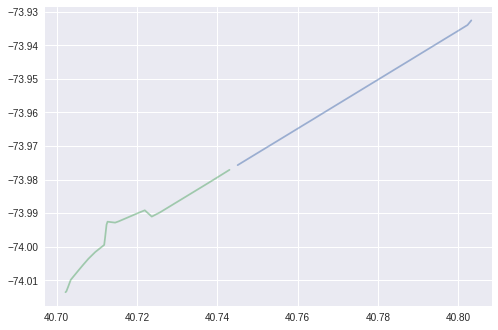

In [26]:
from matplotlib.pylab import plt
# Plot regular route
# fig1 = plt.figure()
# plt.plot(trip_002000_M15_2.latitude[0:32], trip_002000_M15_2.longitude[0:32], '--', alpha=1)
# plt.plot(trip_002000_M15_2.latitude[32:63], trip_002000_M15_2.longitude[32:63], '--', alpha=0.25)
# Plot express route
fig2 = plt.figure()
#plt.scatter(trip_028500_SBS15_1.latitude[0:35], trip_028500_SBS15_1.longitude[0:35], alpha=0.75, c=trip_028500_SBS15_1.timestamp[0:35])
plt.plot(sbs_sorted[0:35].latitude, sbs_sorted[0:35].longitude, alpha=0.5)
plt.plot(sbs_sorted[35:67].latitude, sbs_sorted[35:67].longitude, alpha=0.5)